In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import time

from prime_functions import *
from llama_prime_functions import *


In [2]:
seed_lengths = 10
output_count = 50
num_tests = 20

preprompt="The following is a list of consecutive prime numbers, which continues for the next 1000 pages with no line breaks or punctuation: "
#preprompt="The following is a list of consecutive prime numbers: "


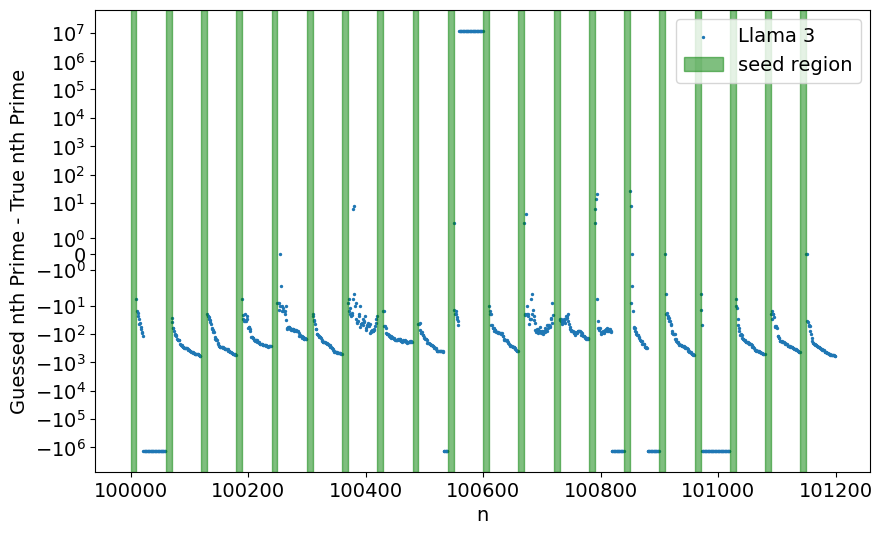

In [5]:
step = seed_lengths + output_count
testing_seed_start_ns = [100_000 + step * i for i in range(num_tests)]
testing_seed_end_ns = [100_000 + step * i + seed_lengths for i in range(num_tests)]

full_primes = nth_prime_list(testing_seed_end_ns[-1] + output_count)

all_seed_primes_n = []
all_seed_primes = []
all_real_primes_n = []
all_real_primes = []
all_llama_primes_n = []
all_llama_primes = []

for test_i in range(num_tests):

    curr_real_primes = full_primes[testing_seed_end_ns[test_i]:testing_seed_end_ns[test_i] + output_count]

    curr_seed_start_n = testing_seed_start_ns[test_i]
    curr_seed_end_n = testing_seed_end_ns[test_i]

    curr_seed_primes = full_primes[curr_seed_start_n:curr_seed_end_n]
    curr_seed_primes_n = np.arange(curr_seed_start_n, curr_seed_end_n)
    curr_real_primes = full_primes[curr_seed_end_n:curr_seed_end_n + output_count]
    curr_real_primes_n = np.arange(curr_seed_end_n, curr_seed_end_n + output_count)

    curr_prompt = preprompt + ", ".join([str(p) for p in curr_seed_primes]) + ","
    curr_llama_primes = get_llama_primes(curr_prompt, max_output_count=output_count, print_stream=False)
    if len(curr_llama_primes) < output_count:
        curr_llama_primes = np.append(curr_llama_primes, np.full(output_count - len(curr_llama_primes), -1))
    curr_llama_primes_n = np.arange(curr_seed_end_n, curr_seed_end_n + output_count)

    all_seed_primes_n += list(curr_seed_primes_n)
    all_seed_primes += list(curr_seed_primes)
    all_real_primes_n += list(curr_real_primes_n)
    all_real_primes += list(curr_real_primes)
    all_llama_primes_n += list(curr_llama_primes_n)
    all_llama_primes += list(curr_llama_primes)

    #print("curr_seed_primes", curr_seed_primes)
    #print("\ncurr_real_primes", curr_real_primes)
    #print("curr_llama_primes", curr_llama_primes)


    individual_plots = False
    if individual_plots:

        plt.figure()
        plt.plot(curr_seed_primes_n, curr_seed_primes, label='Seed Primes', color='g')
        plt.plot(curr_real_primes_n, curr_real_primes, label='Real Primes', color='k')
        plt.plot(curr_llama_primes_n, curr_llama_primes, label='Llama 3 Guesses', color='b')
        plt.legend()
        plt.xlabel('n')
        plt.ylabel("nth Prime")
        plt.show()

        plt.figure()
        plt.plot(curr_llama_primes_n, curr_llama_primes - curr_real_primes)
        plt.xlabel('n')
        plt.ylabel("Llama 3 Guess nth Prime - True nth Prime")
        plt.yscale('symlog')
        plt.show()

all_seed_primes_n = np.array(all_seed_primes_n)
all_seed_primes = np.array(all_seed_primes)
all_real_primes_n = np.array(all_real_primes_n)
all_real_primes = np.array(all_real_primes)
all_llama_primes_n = np.array(all_llama_primes_n)
all_llama_primes = np.array(all_llama_primes)

mpl.rcParams['font.size'] = 14

plt.figure(figsize=(10, 6))
plt.scatter(all_llama_primes_n, all_llama_primes - all_real_primes, s=2, label='Llama 3')
plt.xlabel('n')
plt.ylabel("Guessed nth Prime - True nth Prime")
plt.yscale('symlog')
for i in range(num_tests):
    if i == 0:
        plt.axvspan(testing_seed_start_ns[i], testing_seed_end_ns[i], color='g', alpha=0.5, label="seed region")
    else:
        plt.axvspan(testing_seed_start_ns[i], testing_seed_end_ns[i], color='g', alpha=0.5)
plt.legend()
plt.show()


